In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
url = '../data/csv-theorique/'
agency = pd.read_csv(url + 'agency.csv', sep=';')
calendar = pd.read_csv(url + 'calendar.csv', sep=';')
calendar_dates = pd.read_csv(url + 'calendar_dates.csv', sep=';')
routes = pd.read_csv(url + 'routes.csv', sep=';')
stop_times = pd.read_csv(url + 'stop_times.csv', sep=';')
stops = pd.read_csv(url + 'stops.csv', sep=';')
trips = pd.read_csv(url + 'trips.csv', sep=';')

<Axes: xlabel='stop_id'>

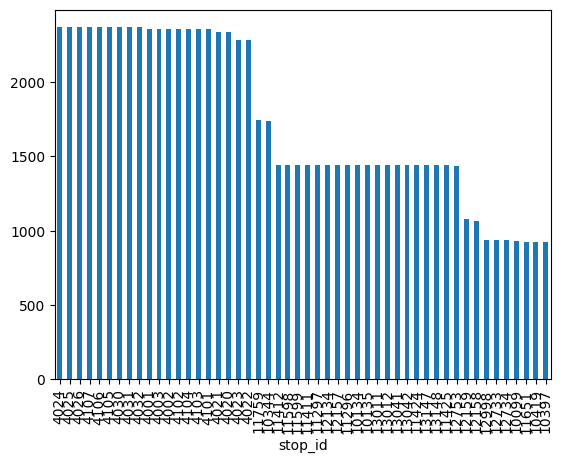

In [19]:
stop_times.groupby("stop_id")["stop_id"].size().sort_values(ascending=False).head(50).plot(kind="bar")

In [20]:
stop_times.arrival_time = pd.to_datetime(stop_times.arrival_time, format='%H:%M:%S')
stop_times.departure_time = pd.to_datetime(stop_times.departure_time, format='%H:%M:%S')

In [21]:
df = pd.merge(stop_times, trips[['trip_id', 'route_id', 'service_id', 'direction_id']], on='trip_id')
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,route_id,service_id,direction_id
0,0,1900-01-01 07:11:00,1900-01-01 07:11:00,12176,1,NaN,NaN,92,T23_RO-2-31,1
1,0,1900-01-01 07:13:00,1900-01-01 07:13:00,12175,2,NaN,NaN,92,T23_RO-2-31,1
2,0,1900-01-01 07:14:00,1900-01-01 07:14:00,11039,3,NaN,NaN,92,T23_RO-2-31,1
3,0,1900-01-01 07:15:00,1900-01-01 07:15:00,12173,4,NaN,NaN,92,T23_RO-2-31,1
4,0,1900-01-01 07:16:00,1900-01-01 07:16:00,11347,5,NaN,NaN,92,T23_RO-2-31,1
...,...,...,...,...,...,...,...,...,...,...
484191,9998,1900-01-01 18:18:00,1900-01-01 18:18:00,4104,4,NaN,NaN,402,ASCESC-2-127,0
484192,9999,1900-01-01 18:14:00,1900-01-01 18:14:00,4101,1,NaN,NaN,402,ASCESC-2-127,0
484193,9999,1900-01-01 18:15:00,1900-01-01 18:15:00,4102,2,NaN,NaN,402,ASCESC-2-127,0
484194,9999,1900-01-01 18:16:00,1900-01-01 18:16:00,4103,3,NaN,NaN,402,ASCESC-2-127,0


In [31]:
route = 14
service = "IST_M1-2-32"

#df[(df.route_id == route) & (df.service_id == service) & (df.stop_sequence == 1) & ((df.direction_id == 0)|(df.direction_id == 1))].sort_values(by='trip_id')

C:\Users\bhtpe\AppData\Local\Temp\ipykernel_5904\2426554052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['departure_time'] = pd.to_datetime(df_filtered['departure_time']).dt.time
C:\Users\bhtpe\AppData\Local\Temp\ipykernel_5904\2426554052.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_num'] = df_filtered['departure_time'].apply(lambda t: t.hour + t.minute/60 + t.second/3600)


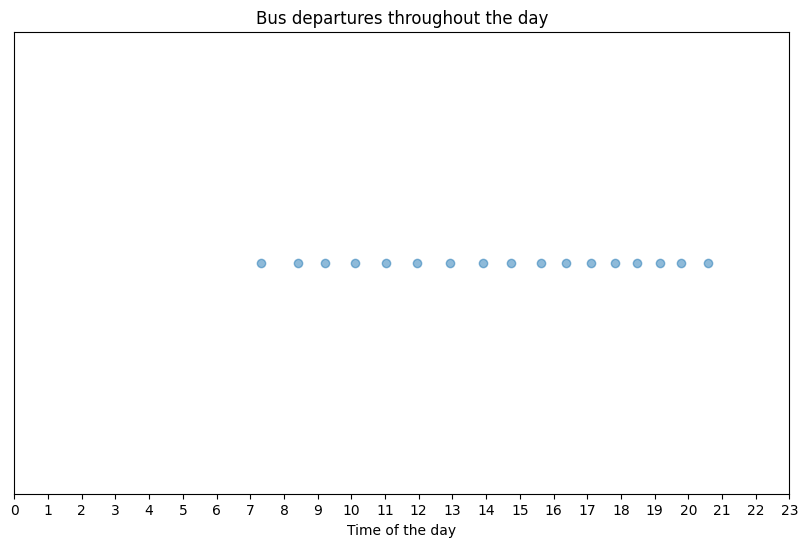

In [39]:
#remarque : les trip_id ne correspondent pas à l'ordre des départs... wtf

route = 14
service = "IST_M1-2-32"

df_filtered = df[(df.route_id == route) & (df.service_id == service) & (df.stop_sequence == 1) & (df.direction_id == 0)]

# Convert departure_time to datetime and extract time
df_filtered['departure_time'] = pd.to_datetime(df_filtered['departure_time']).dt.time

# Convert time to a number in order to plot
df_filtered['time_num'] = df_filtered['departure_time'].apply(lambda t: t.hour + t.minute/60 + t.second/3600)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['time_num'], [1]*len(df_filtered), alpha=0.5)
plt.xticks(np.arange(24))
plt.xlabel('Time of the day')
plt.yticks([])
plt.title('Bus departures throughout the day')
plt.show()

# DONNEES TEMPS REEL

In [68]:
url = '../data/csv-temps_reel/'
agency_tr = pd.read_csv(url + 'agency.csv', sep=';')
calendar_dates_tr = pd.read_csv(url + 'calendar_dates.csv', sep=';')
routes_tr = pd.read_csv(url + 'routes.csv', sep=';')
stop_times_tr = pd.read_csv(url + 'stop_times.csv', sep=';')
stops_tr = pd.read_csv(url + 'stops.csv', sep=';')
trips_tr = pd.read_csv(url + 'trips.csv', sep=';')

In [69]:
stop_times_tr.arrival_time = pd.to_datetime(stop_times_tr.arrival_time, format='%H:%M:%S')
stop_times_tr.departure_time = pd.to_datetime(stop_times_tr.departure_time, format='%H:%M:%S')

In [88]:
df_tr = pd.merge(stop_times_tr, trips_tr[['trip_id', 'route_id', 'service_id', 'direction_id']], on='trip_id')

df_tr['route_id'] = df_tr['route_id'].astype(str)
routes_tr['route_id'] = routes_tr['route_id'].astype(str)
df_tr['route_id'] = df_tr['route_id'].str.strip()
routes_tr['route_id'] = routes_tr['route_id'].str.strip()

df_tr = pd.merge(df_tr, routes_tr[['route_id', 'route_short_name']], on='route_id', how='left')

df_tr[(df_tr.trip_id == 1001)]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,service_id,direction_id,route_short_name
552,1001,1900-01-01 05:59:00,1900-01-01 05:59:00,1011,1,111,10304,0,NaN
553,1001,1900-01-01 06:00:00,1900-01-01 06:00:00,1021,2,111,10304,0,NaN
554,1001,1900-01-01 06:01:00,1900-01-01 06:01:00,1031,3,111,10304,0,NaN
555,1001,1900-01-01 06:02:00,1900-01-01 06:02:00,1041,4,111,10304,0,NaN
556,1001,1900-01-01 06:03:00,1900-01-01 06:03:00,2011,5,111,10304,0,NaN
557,1001,1900-01-01 06:04:00,1900-01-01 06:04:00,1051,6,111,10304,0,NaN
558,1001,1900-01-01 06:05:00,1900-01-01 06:05:00,1061,7,111,10304,0,NaN
559,1001,1900-01-01 06:06:00,1900-01-01 06:06:00,1071,8,111,10304,0,NaN
560,1001,1900-01-01 06:06:00,1900-01-01 06:06:00,1081,9,111,10304,0,NaN
561,1001,1900-01-01 06:07:00,1900-01-01 06:07:00,1091,10,111,10304,0,NaN


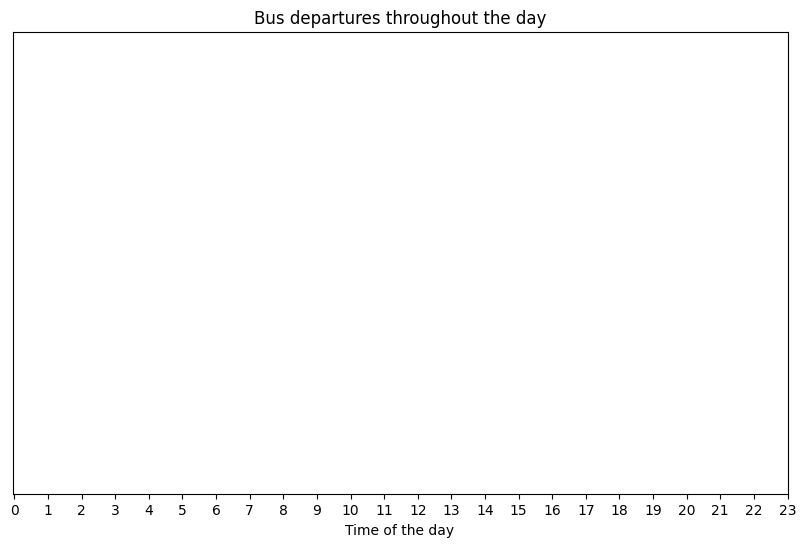

In [84]:
route_short_name = "A"
service = 10304

df_filtered = df_tr[(df_tr.route_short_name == route) & (df_tr.service_id == service) & (df_tr.stop_sequence == 1) & (df_tr.direction_id == 0)]

# Convert departure_time to datetime and extract time
df_filtered['departure_time'] = pd.to_datetime(df_filtered['departure_time']).dt.time

# Convert time to a number in order to plot
df_filtered['time_num'] = df_filtered['departure_time'].apply(lambda t: t.hour + t.minute/60 + t.second/3600)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['time_num'], [1]*len(df_filtered), alpha=0.5)
plt.xticks(np.arange(24))
plt.xlabel('Time of the day')
plt.yticks([])
plt.title('Bus departures throughout the day')
plt.show()

Les routes_short_name matchent, mais  les service_id non : il faut faire matcher sur les jours, c'est-à-dire mardi 05/01 on avait prévu tel truc d'après les services théoriques (dans calendar_dates), et on a eu tel autre avec tel service (dans calendar parce que tout est rentré comme exception ce qui est logique, on prévoit pour toutes les semaines, mais on observe au jour le jour)